<a href="https://colab.research.google.com/github/KshitijGupta99/Clothify/blob/main/ML_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
style.use('ggplot')
import keras

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
data = keras.datasets.fashion_mnist

(train_img, train_label), (test_img, test_label) = data.load_data()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

train_img = train_img / 255.0
test_img = test_img / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape = (28,28)),
#     keras.layers.Dense(128, activation="relu"),
#     keras.layers.Dense(128, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))




In [13]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_img, train_label, epochs = 6 ,batch_size=32 , validation_data=(test_img, test_label))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7700 - loss: 0.6246 - val_accuracy: 0.8805 - val_loss: 0.3352
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8902 - loss: 0.3010 - val_accuracy: 0.8994 - val_loss: 0.2715
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9099 - loss: 0.2408 - val_accuracy: 0.8881 - val_loss: 0.2993
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9240 - loss: 0.2039 - val_accuracy: 0.9057 - val_loss: 0.2651
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9345 - loss: 0.1764 - val_accuracy: 0.9048 - val_loss: 0.2753
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9444 - loss: 0.1504 - val_accuracy: 0.9127 - val_loss: 0.2589


In [ ]:
with open ("pickle_model.pickle", "wb") as f:
  pickle.dump(model, f)
picklein = open("pickle_model.pickle", "rb")
model = pickle.load(picklein)

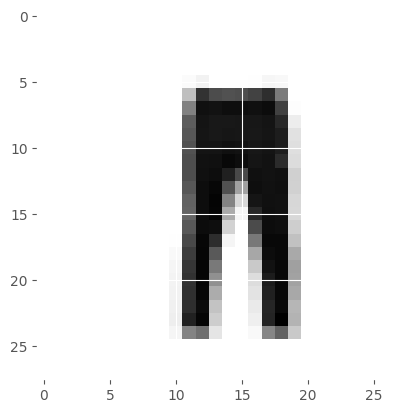

Coat


In [ ]:
index = 76
plt.imshow(classes[test_img], cmap = plt.cm.binary)
plt.show()
print(classes[train_label[index]])

In [17]:
model.save('model.keras')

In [5]:
test_loss , test_acc = model.evaluate(test_img, test_label)

print("test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8814 - loss: 0.3705
test Accuracy: 0.8831999897956848


<Figure size 640x480 with 0 Axes>

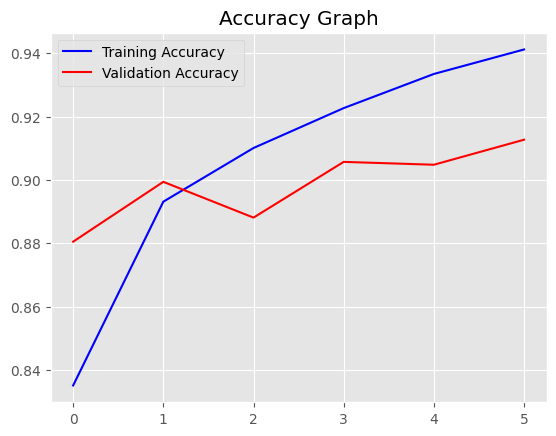

<Figure size 640x480 with 0 Axes>

In [14]:
# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

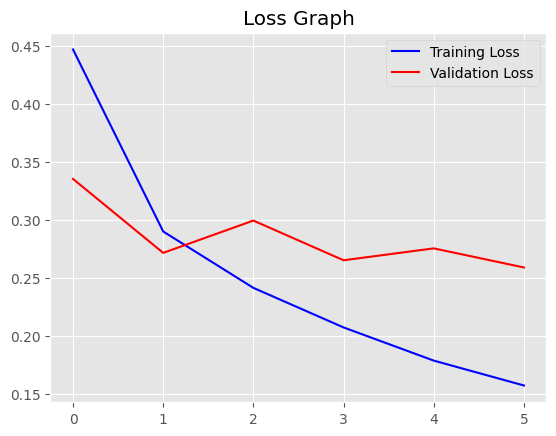

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [5]:
print(model)

<Sequential name=sequential_1, built=True>


In [ ]:
def transform_float_array(arr):
    transformed = []

    for row in arr:
        new_row = []
        for num in row:
            float_range = 1.00 - num
            new_row.append(float_range)
        transformed.append(new_row)

    return transformed

In [6]:
from PIL import Image
import numpy as np

def transform_float_array(arr):
    transformed = []

    for row in arr:
        new_row = []
        for num in row:
            float_range = 1.00 - num
            new_row.append(float_range)
        transformed.append(new_row)

    return transformed

img_path = "Your image path"
img = Image.open(img_path)
img = img.convert("L")

img = img.resize((28, 28))

img_array = np.array(img)/255.0
img_array = transform_float_array(img_array)
print(img_array)

img.save("resized_28x28_image.png")

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015686274509803977, 0.1568627450980392, 0.3803921568627451, 0.1686274509803921, 0.0, 0.007843137254901933, 0.17647058823529416, 0.403921568627451, 0.16470588235294115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215686274509665, 0.0, 0.16078431372549018, 0.5019607843137255, 0.6980392156862745, 0.8431372549019608, 0.9294117647058824, 0.8470588235294118, 0.6705882352941177, 0.6901960784313725, 0.8627450980392157, 0.9254901960784314, 0.8509803921568627, 0.6392156862745098, 0.32156862745098036, 0.03529411764705881, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35686274509803917, 0.8431372549019608, 0.9137254901960784, 0.8941176470588236, 0.8784313725490196, 0.8784313725490196, 0.8980392156862745, 0.9019607843137255, 0.9019607843137255, 0.8941176470588236, 0.8823529411764706, 0.8862745098039215, 0.9137254901960784, 0.9176470588235294, 0.6862745098039216, 0.11372549019607847, 0.0, 0

In [9]:
prediction  = model.predict(np.array(img_array).reshape(1, 28, 28))
classes[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'T-shirt/top'